In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('722-BDAS-jzha497').getOrCreate()


In [108]:
df=spark.read.load('./Heart_Disease_Prediction.csv',format="csv",header="true", inferSchema=True)

In [109]:
df.show()


+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
|Age|Sex|Chest pain type| BP|Cholesterol|FBS over 120|EKG results|Max HR|Exercise angina|ST depression|Slope of ST|Number of vessels fluro|Thallium|Heart Disease|
+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
| 70|  1|              4|130|        322|           0|          2|   109|              0|          2.4|          2|                      3|       3|            1|
| 67|  0|              3|115|        564|           0|          2|   160|              0|          1.6|          2|                      0|       7|            0|
| 57|  1|              2|124|        261|           0|          0|   141|              0|          0.3|          1|                      0|       7|            1|
| 64|  1|             

In [110]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------------+------------------+------------------+
|summary|              Age|               Sex|   Chest pain type|                BP|       Cholesterol|       FBS over 120|       EKG results|            Max HR|   Exercise angina|     ST depression|       Slope of ST|Number of vessels fluro|          Thallium|     Heart Disease|
+-------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------------+------------------+------------------+
|  count|              270|               270|               270|               269|               268|                270|               270|               

In [111]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Chest pain type: integer (nullable = true)
 |-- BP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FBS over 120: integer (nullable = true)
 |-- EKG results: integer (nullable = true)
 |-- Max HR: integer (nullable = true)
 |-- Exercise angina: integer (nullable = true)
 |-- ST depression: double (nullable = true)
 |-- Slope of ST: integer (nullable = true)
 |-- Number of vessels fluro: integer (nullable = true)
 |-- Thallium: integer (nullable = true)
 |-- Heart Disease: integer (nullable = true)



In [112]:
import matplotlib.pyplot as plt
import pandas as pd
Heart_df = pd.read_csv("./Heart_Disease_Prediction.csv")

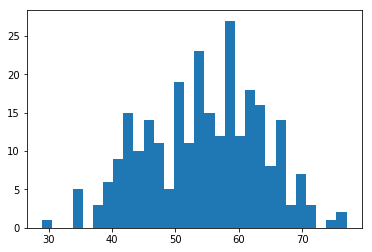

In [113]:
plt.hist(Heart_df["Age"],bins=30)
plt.show()

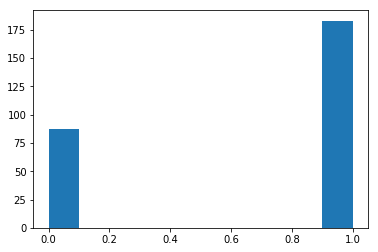

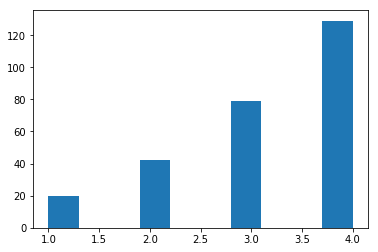

In [114]:
plt.hist(Heart_df["Sex"])
plt.show()

plt.hist(Heart_df["Chest pain type"])
plt.show()




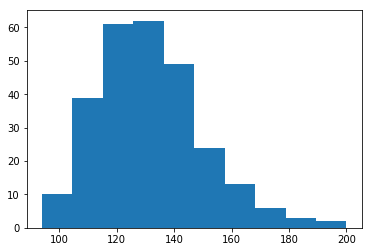

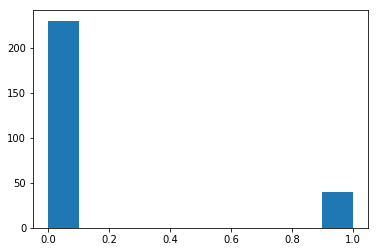

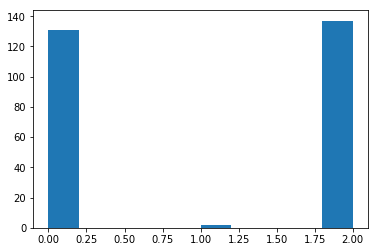

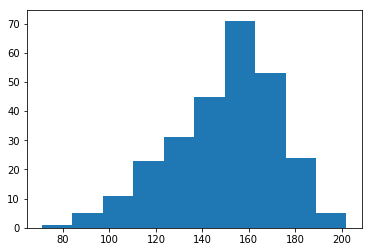

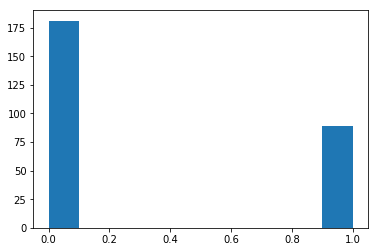

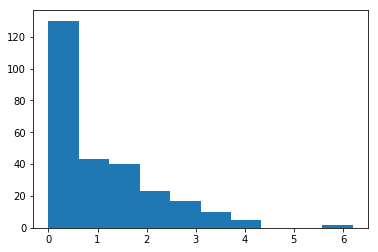

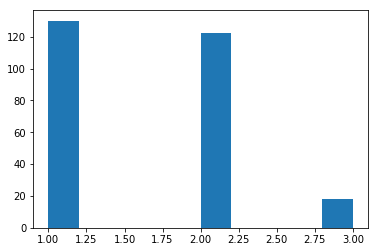

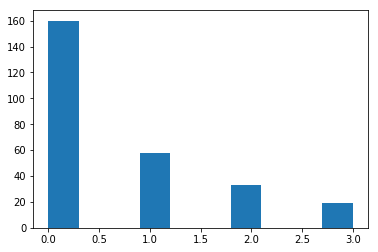

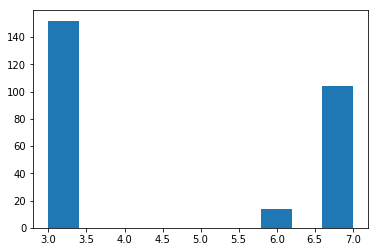

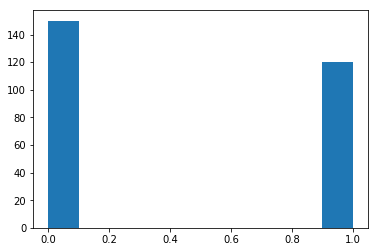

In [115]:
plt.hist(Heart_df["BP"].dropna())
plt.show()
plt.hist(Heart_df["FBS over 120"])
plt.show()
plt.hist(Heart_df["EKG results"])
plt.show()
plt.hist(Heart_df["Max HR"].dropna())
plt.show()
plt.hist(Heart_df["Exercise angina"])
plt.show()
plt.hist(Heart_df["ST depression"])
plt.show()
plt.hist(Heart_df["Slope of ST"])
plt.show()
plt.hist(Heart_df["Number of vessels fluro"])
plt.show()
plt.hist(Heart_df["Thallium"])
plt.show()
plt.hist(Heart_df["Heart Disease"])
plt.show()

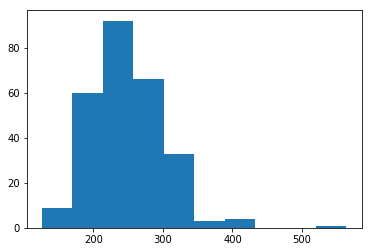

In [116]:
plt.hist(Heart_df["Cholesterol"].dropna())
plt.show()

In [117]:
for col in df.columns:
    print(col, "\t", "with null values: ", 
          df.filter(df[col].isNull()).count())

Age 	 with null values:  0
Sex 	 with null values:  0
Chest pain type 	 with null values:  0
BP 	 with null values:  1
Cholesterol 	 with null values:  2
FBS over 120 	 with null values:  0
EKG results 	 with null values:  0
Max HR 	 with null values:  1
Exercise angina 	 with null values:  0
ST depression 	 with null values:  0
Slope of ST 	 with null values:  0
Number of vessels fluro 	 with null values:  0
Thallium 	 with null values:  0
Heart Disease 	 with null values:  0


In [118]:
len(df.columns)


14

In [119]:
df.count()

270

In [120]:
from pyspark.sql.functions import when
import pyspark.sql.functions as F

def mean_of_pyspark_columns(df, numeric_cols):
    col_with_mean = []
    for col in numeric_cols:
        mean_value = df.select(F.avg(df[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row: row[avg_col]).collect()
        col_with_mean.append([col, res[0]])
    return col_with_mean


def fill_missing_with_mean(df, numeric_cols):
    col_with_mean = mean_of_pyspark_columns(df, numeric_cols)
    for col, mean in col_with_mean:
        df = df.withColumn(col, when(df[col].isNull() == True, F.lit(mean)).otherwise(df[col]))
    return df

if __name__ == '__main__':
    
    numeric_cols = ['BP', 'Cholesterol','Max HR']  
    df = fill_missing_with_mean(df, numeric_cols)  
    df.show()

+---+---+---------------+-----+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
|Age|Sex|Chest pain type|   BP|Cholesterol|FBS over 120|EKG results|Max HR|Exercise angina|ST depression|Slope of ST|Number of vessels fluro|Thallium|Heart Disease|
+---+---+---------------+-----+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
| 70|  1|              4|130.0|      322.0|           0|          2| 109.0|              0|          2.4|          2|                      3|       3|            1|
| 67|  0|              3|115.0|      564.0|           0|          2| 160.0|              0|          1.6|          2|                      0|       7|            0|
| 57|  1|              2|124.0|      261.0|           0|          0| 141.0|              0|          0.3|          1|                      0|       7|            1|
| 64|  1| 

In [121]:
for col in df.columns:
    print(col, "\t", "with null values: ", 
          df.filter(df[col].isNull()).count())

Age 	 with null values:  0
Sex 	 with null values:  0
Chest pain type 	 with null values:  0
BP 	 with null values:  0
Cholesterol 	 with null values:  0
FBS over 120 	 with null values:  0
EKG results 	 with null values:  0
Max HR 	 with null values:  0
Exercise angina 	 with null values:  0
ST depression 	 with null values:  0
Slope of ST 	 with null values:  0
Number of vessels fluro 	 with null values:  0
Thallium 	 with null values:  0
Heart Disease 	 with null values:  0


In [122]:
print(Heart_df.corr()['Heart Disease'])

Age                        0.212322
Sex                        0.297721
Chest pain type            0.417436
BP                         0.155365
Cholesterol                0.114657
FBS over 120              -0.016319
EKG results                0.182091
Max HR                    -0.416492
Exercise angina            0.419303
ST depression              0.417967
Slope of ST                0.337616
Number of vessels fluro    0.455336
Thallium                   0.525020
Heart Disease              1.000000
Name: Heart Disease, dtype: float64


In [124]:
df=df.drop('Max HR')


In [125]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Chest pain type: integer (nullable = true)
 |-- BP: double (nullable = true)
 |-- Cholesterol: double (nullable = true)
 |-- FBS over 120: integer (nullable = true)
 |-- EKG results: integer (nullable = true)
 |-- Exercise angina: integer (nullable = true)
 |-- ST depression: double (nullable = true)
 |-- Slope of ST: integer (nullable = true)
 |-- Number of vessels fluro: integer (nullable = true)
 |-- Thallium: integer (nullable = true)
 |-- Heart Disease: integer (nullable = true)



In [126]:
for col in df.columns:
    print(col, "\t", "with null values: ", 
          df.filter(df[col].isNull()).count())

Age 	 with null values:  0
Sex 	 with null values:  0
Chest pain type 	 with null values:  0
BP 	 with null values:  0
Cholesterol 	 with null values:  0
FBS over 120 	 with null values:  0
EKG results 	 with null values:  0
Exercise angina 	 with null values:  0
ST depression 	 with null values:  0
Slope of ST 	 with null values:  0
Number of vessels fluro 	 with null values:  0
Thallium 	 with null values:  0
Heart Disease 	 with null values:  0


In [127]:
df.orderBy('Age').show(5)

+---+---+---------------+-----+-----------+------------+-----------+---------------+-------------+-----------+-----------------------+--------+-------------+
|Age|Sex|Chest pain type|   BP|Cholesterol|FBS over 120|EKG results|Exercise angina|ST depression|Slope of ST|Number of vessels fluro|Thallium|Heart Disease|
+---+---+---------------+-----+-----------+------------+-----------+---------------+-------------+-----------+-----------------------+--------+-------------+
| 29|  1|              2|130.0|      204.0|           0|          2|              0|          0.0|          1|                      0|       3|            0|
| 34|  0|              2|118.0|      210.0|           0|          0|              0|          0.7|          1|                      0|       3|            0|
| 34|  1|              1|118.0|      182.0|           0|          2|              0|          0.0|          1|                      0|       3|            0|
| 35|  1|              4|120.0|      198.0|         

In [128]:
heart_disease=Heart_df.iloc[:,-1]
Heart_df.drop(['Heart Disease'],axis=1,inplace=True)
Heart_df=(Heart_df-Heart_df.mean())/(Heart_df.std())
Heart_df['Heart Disease']=heart_disease
Heart_df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.708920,0.688222,0.869313,-0.075410,1.395435,-0.416256,0.979844,-1.752392,-0.699923,1.178823,0.675165,2.468099,-0.874083,1
1,1.379578,-1.447639,-0.183219,-0.913647,6.065076,-0.416256,0.979844,0.449574,-0.699923,0.480261,0.675165,-0.710216,1.187073,0
2,0.281771,0.688222,-1.235750,-0.410705,0.218376,-0.416256,-1.024382,-0.370766,-0.699923,-0.654902,-0.952466,-0.710216,1.187073,1
3,1.050236,0.688222,0.869313,-0.187175,0.256969,-0.416256,-1.024382,-1.925096,1.423438,-0.742222,0.675165,0.349222,1.187073,0
4,2.148043,-1.447639,-1.235750,-0.634234,0.372745,-0.416256,0.979844,-1.234283,1.423438,-0.742222,-0.952466,0.349222,-0.874083,0


In [131]:

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


df.columns

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

In [130]:
assembler = VectorAssembler(
  inputCols=['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium'],
              outputCol= 'features')

In [132]:
output = assembler.transform(df)

In [133]:
final_data = output.select("features",'Heart Disease')

In [134]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [135]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [136]:

dtc = DecisionTreeClassifier(labelCol='Heart Disease',featuresCol='features')
rfc = RandomForestClassifier(labelCol='Heart Disease',featuresCol='features')
gbt = GBTClassifier(labelCol='Heart Disease',featuresCol='features')

In [137]:
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [138]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [139]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Heart Disease')

In [140]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))


print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))


my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='Heart Disease', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

DTC
0.7435740514075887
RFC
0.8641370869033048
GBT
0.6817625458996327


In [141]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Heart Disease", predictionCol="prediction", metricName="accuracy")

In [142]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [143]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 71.60%
----------------------------------------
A random forest ensemble has an accuracy of: 81.48%
----------------------------------------
An ensemble using GBT has an accuracy of: 69.14%
